In [1]:
import pandas as pd
import numpy as np 
import re

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()
# # used for better images in medium article
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

# Required downloads for use with above models
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

<ol>
    <li>Clean text
        <ul>
            <li> Parse words
            <li> Remove all special characters
            <li> Cleaned formatting
        </ul>
    <li> Tokenize
         <ul>
             <li> Words
             <li> Sentences
        </ul>
    <li> Counts
         <ul>
             <li> Word Count w/ visualization
             <li> Sentence Count w/ visualization
        </ul>
    <li> Stop Word Removal 
    <li> Stemitization
    <li> Lemmatization
    <li> create one large corpus for analysis               
    <li>POS Tagging Analysis
         <ul>
             <li> Identify the POS of interest
             <li> Chunking for phrases rdf triplets similar use
             <li> NE Dictionary for NER
             <li> Are there any patterns associated with their use, lexical grammatical?
         </ul>
    <li> Frequent Words
         <ul>
             <li> N-Grams
             <li> BiGrams
             <li> TriGrams
             <li> Matched with any patterns from POS and determine any importance?
        </ul>
    <li> Topic Model Test
         <ul>
             <li> LDA
             <li> LSA?
             <li> LDA Visualization
             <li> Any use case specifics, matters of importance?
             <li> topic analyses
        </ul>
    <li> Text Rank for keyword extraction   
    <li> TF-IDF
    <li> RAKE
    <li> Text Rank *
    <li> Clustering
    <li> BERT Q&A
</ol>

In [3]:
##df = pd.read_csv(r'data\collected_data\indeed_job_dataset.csv')
df = pd.read_excel('datar.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   jobTitle         1048 non-null   object
 1   skill1           1048 non-null   object
 2   skill2           1048 non-null   object
 3   skill3           1048 non-null   object
 4   skill4           1048 non-null   object
 5   skill5           1048 non-null   object
 6   skill6           1048 non-null   object
 7   jobDescription   1048 non-null   object
 8   headline         1048 non-null   object
 9   jobTitle2        1048 non-null   object
 10  jobDescription2  1047 non-null   object
 11  currentJob       1048 non-null   object
 12  pastJob          1048 non-null   object
 13  job              1048 non-null   object
dtypes: object(14)
memory usage: 114.8+ KB


In [41]:
# scaling down the dataset as the description is all that is required
df_desc = df.skill1

In [42]:
df_desc

0       SQL Server Integration Services (SSIS)
1                                      Redmine
2               Extract, Transform, Load (ETL)
3                  Machine learning algorithms
4                                   E-commerce
                         ...                  
1043                                  Strategy
1044                                 Budgeting
1045                                       XML
1046                                      Java
1047                        Project management
Name: skill1, Length: 1048, dtype: object

In [43]:
# random choice to get a sense of the data formatting and cell to check other indices
df_desc.iloc[598]

'Windows 7'

In [11]:
def clean_text(raw):
    '''Case specific to be used with pandas apply method'''
    try:
        # remove carriage returns and new lines
        raw = raw.replace('\r', '')
        raw = raw.replace('\n', '')
        
        # brackets appear in all instances
        raw = raw.replace('[', '')
        raw = raw.replace(']', '')
        raw = raw.replace(')', '')
        raw = raw.replace('(', '')
        
        # removing html tags
        clean_html = re.compile('<.*?>')
        clean_text = re.sub(clean_html, ' ', raw)
        
        # removing duplicate whitespace in between words
        clean_text = re.sub(" +", " ", clean_text) 
        
        # stripping first and last white space 
        clean_text = clean_text.strip()
        
        # commas had multiple spaces before and after in each instance
        clean_text = re.sub(" , ", ", ", clean_text) 
        
        # eliminating the extra comma after a period
        clean_text = clean_text.replace('.,', '.')
        
        # using try and except due to Nan in the column
    except:
        clean_text = np.nan
        
    return clean_text

In [44]:
df_desc = df_desc.apply(clean_text)


In [46]:
df_desc

,skill1
0,SQL Server Integration Services SSIS
1,Redmine
2,"Extract, Transform, Load ETL"
3,Machine learning algorithms
4,E-commerce
...,...
1043,Strategy
1044,Budgeting
1045,XML
1046,Java


In [45]:
# change the type from series to df and drop all missing values total: 301 missing descriptions
df_desc = pd.DataFrame(df_desc)
df_desc.dropna(inplace = True)
df_desc.reset_index(inplace = True, drop = True)

# Tokenization

In [47]:
# create a temp column for lowercased description
df_desc['skill1'] = df_desc.skill1.str.lower()

In [48]:
# regexp tokenizer eliminates the punctuation for the word count and is faster than word_tokenizer
tokenizer = RegexpTokenizer(r"\w+")
df_desc['word_tokenized'] = df_desc.skill1.apply(lambda row: tokenizer.tokenize(row))


In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
df_desc['sentence_tokenized'] = df_desc.skill1.apply(lambda row: sent_tokenize(row))

In [51]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   skill1              1048 non-null   object
 1   word_tokenized      1048 non-null   object
 2   sentence_tokenized  1048 non-null   object
dtypes: object(3)
memory usage: 24.7+ KB


In [52]:
df_desc.word_tokenized.head()

0    [sql, server, integration, services, ssis]
1                                     [redmine]
2               [extract, transform, load, etl]
3               [machine, learning, algorithms]
4                                 [e, commerce]
Name: word_tokenized, dtype: object

# Word Count

In [53]:
# obtains a word count for each individual job description 
df_desc['word_count'] = df_desc.word_tokenized.str.len()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


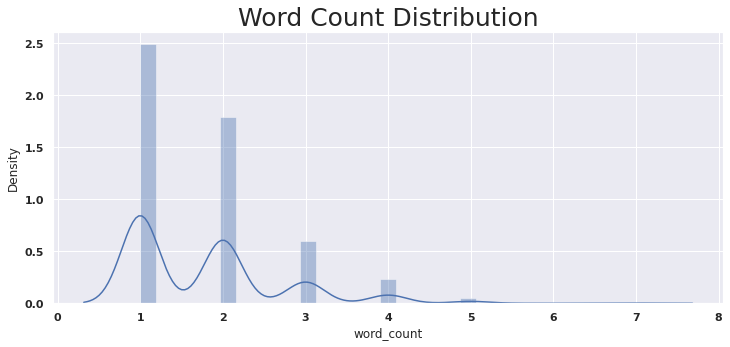

In [54]:
plt.figure(figsize = (12,5))
sns.distplot(df_desc['word_count'])
plt.title('Word Count Distribution', size = 25);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


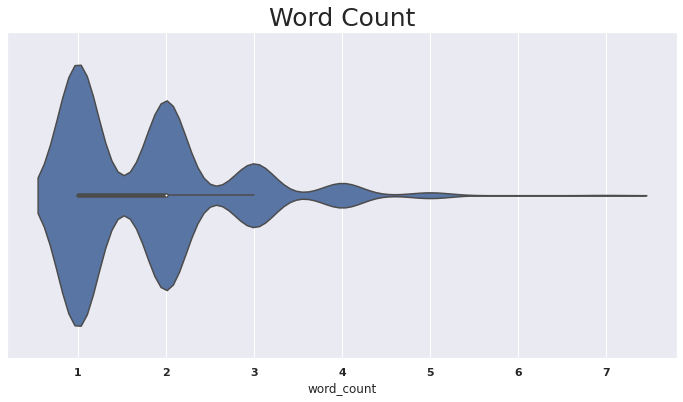

In [55]:
plt.figure(figsize = (12, 6));
sns.violinplot(df_desc["word_count"])
plt.title('Word Count', size = 25);

# Sentence Count

In [56]:
# obtains sentence count for each indiviual job description
df_desc['sentence_count'] = df_desc.sentence_tokenized.str.len()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


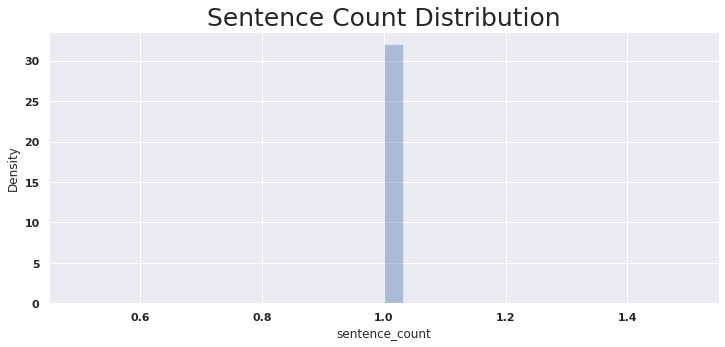

In [57]:
plt.figure(figsize = (12,5))
sns.distplot(df_desc['sentence_count'])
plt.title('Sentence Count Distribution', size = 25);

# Descriptive Statistics

In [58]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   skill1              1048 non-null   object
 1   word_tokenized      1048 non-null   object
 2   sentence_tokenized  1048 non-null   object
 3   word_count          1048 non-null   int64 
 4   sentence_count      1048 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 41.1+ KB


In [ ]:
# indices to be removed were examined by description of observations who's value were below 11; 
# extra indices included are redundant or had no relevant info;
##extra_indices = [20, 21, 36, 155, 428, 478, 685, 900, 1008, 1009]
##indices_remove =  df_desc.loc[df_desc.word_count <= 12].index 
##indices_remove = list(indices_remove) + extra_indices
##print(len(indices_remove), 'observations to be removed')

1058 observations to be removed


In [ ]:
##df_desc.drop(indices_remove, inplace = True)

In [ ]:
##print(5413 - df_desc.shape[0], 'observations have been removed. Resulting in', df_desc.shape[0], 'observations within the dataset.')

5413 observations have been removed. Resulting in 0 observations within the dataset.


In [59]:
df_desc.describe()

,word_count,sentence_count
count,1048.000000,1048.0
mean,1.761450,1.0
std,0.915933,0.0
min,1.000000,1.0
25%,1.000000,1.0
50%,2.000000,1.0
75%,2.000000,1.0
max,7.000000,1.0


# Stop Words

In [60]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   skill1              1048 non-null   object
 1   word_tokenized      1048 non-null   object
 2   sentence_tokenized  1048 non-null   object
 3   word_count          1048 non-null   int64 
 4   sentence_count      1048 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 41.1+ KB


In [61]:
df_desc.head()

,skill1,word_tokenized,sentence_tokenized,word_count,sentence_count
0,sql server integration services ssis,"[sql, server, integration, services, ssis]",[sql server integration services ssis],5,1
1,redmine,[redmine],[redmine],1,1
2,"extract, transform, load etl","[extract, transform, load, etl]","[extract, transform, load etl]",4,1
3,machine learning algorithms,"[machine, learning, algorithms]",[machine learning algorithms],3,1
4,e-commerce,"[e, commerce]",[e-commerce],2,1


In [62]:
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in text if word not in stop_words]
    return cleaned

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [65]:
df_desc['clean_words'] = df_desc.word_tokenized.apply(stopword_removal)

# Stemming & Lemmatization

In [66]:
# stemmed and lemma words were both examined to choose which method was best suited
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

In [67]:
df_desc['clean_stemmed'] = df_desc.clean_words.apply(stemming)

In [68]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [70]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [71]:
df_desc['clean_lemmed'] = df_desc.clean_words.apply(lemming)

In [72]:
df_desc['clean_lemmed'].head()

0    [sql, server, integration, service, ssis]
1                                    [redmine]
2              [extract, transform, load, etl]
3               [machine, learning, algorithm]
4                                [e, commerce]
Name: clean_lemmed, dtype: object

In [73]:
# general corpus & one distinguished with lemmatization applied
# to be used with an additional for loop in the future
lem_corpus = []
for row in df_desc.clean_lemmed:
    lem_corpus += row

In [74]:
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

In [75]:
len(stem_corpus), len(lem_corpus)

(1830, 1830)

# Frequent Words 

## (Stemmed)

In [76]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq

(-0.5, 399.5, 199.5, -0.5)

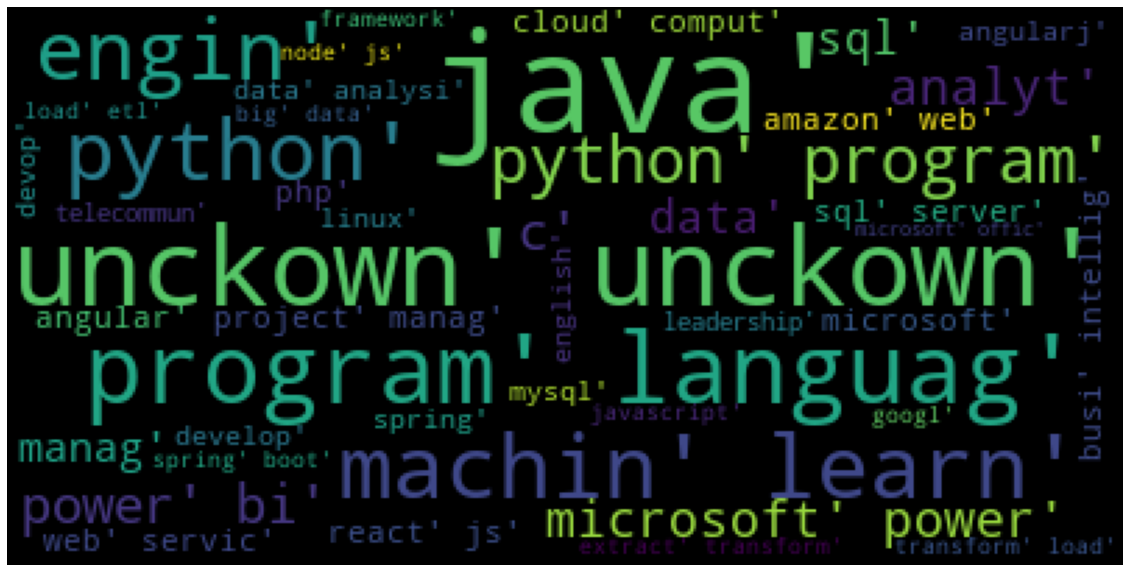

In [77]:
stem_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          max_font_size=50, 
                          min_font_size = 6,
                          random_state=42
                         ).generate(str(stem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [78]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns=["Word", "Freq"]


In [80]:
top_stem.head()
# top_stem.tail()

,Word,Freq
374,electr,1
375,entrepreneurship,1
376,innov,1
377,outsourc,1
378,budget,1


In [81]:
top_stem.describe()

,Freq
count,379.000000
mean,4.730871
std,8.627284
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,89.000000


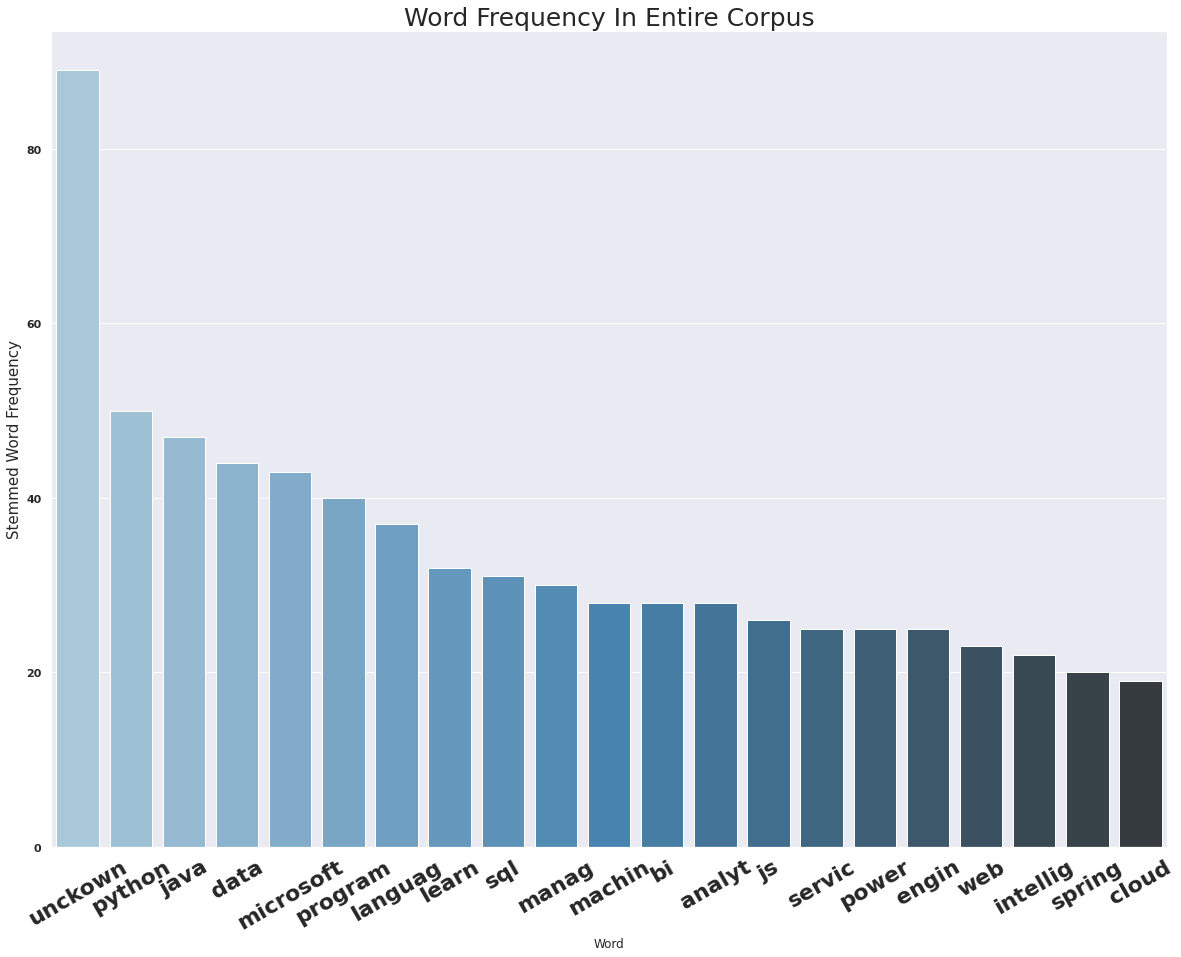

In [82]:
#Barplot of most freq words
sns.set(rc={'figure.figsize':(20,15)})
stem_bar = sns.barplot(x="Word", y="Freq", data=top_stem[:21], palette="Blues_d")
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Stemmed Word Frequency', size = 15)
stem_bar.set_xticklabels(stem_bar.get_xticklabels(), rotation=30, fontsize = 22)


## (Lemmatized)

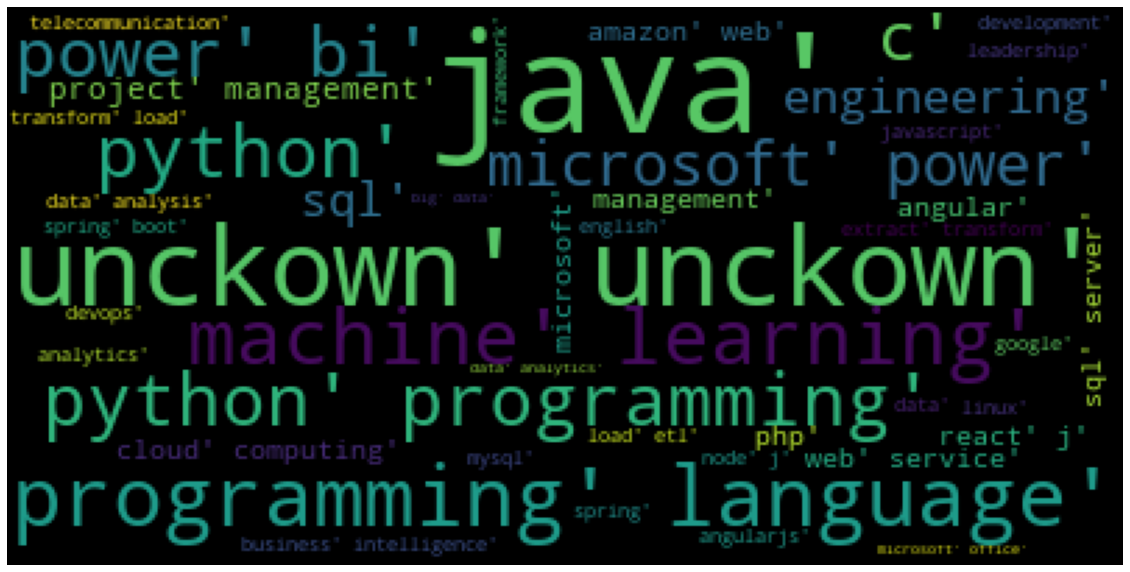

In [100]:
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(lem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off');
wordcloud.to_file('lemma_wordcloud.png');


In [84]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

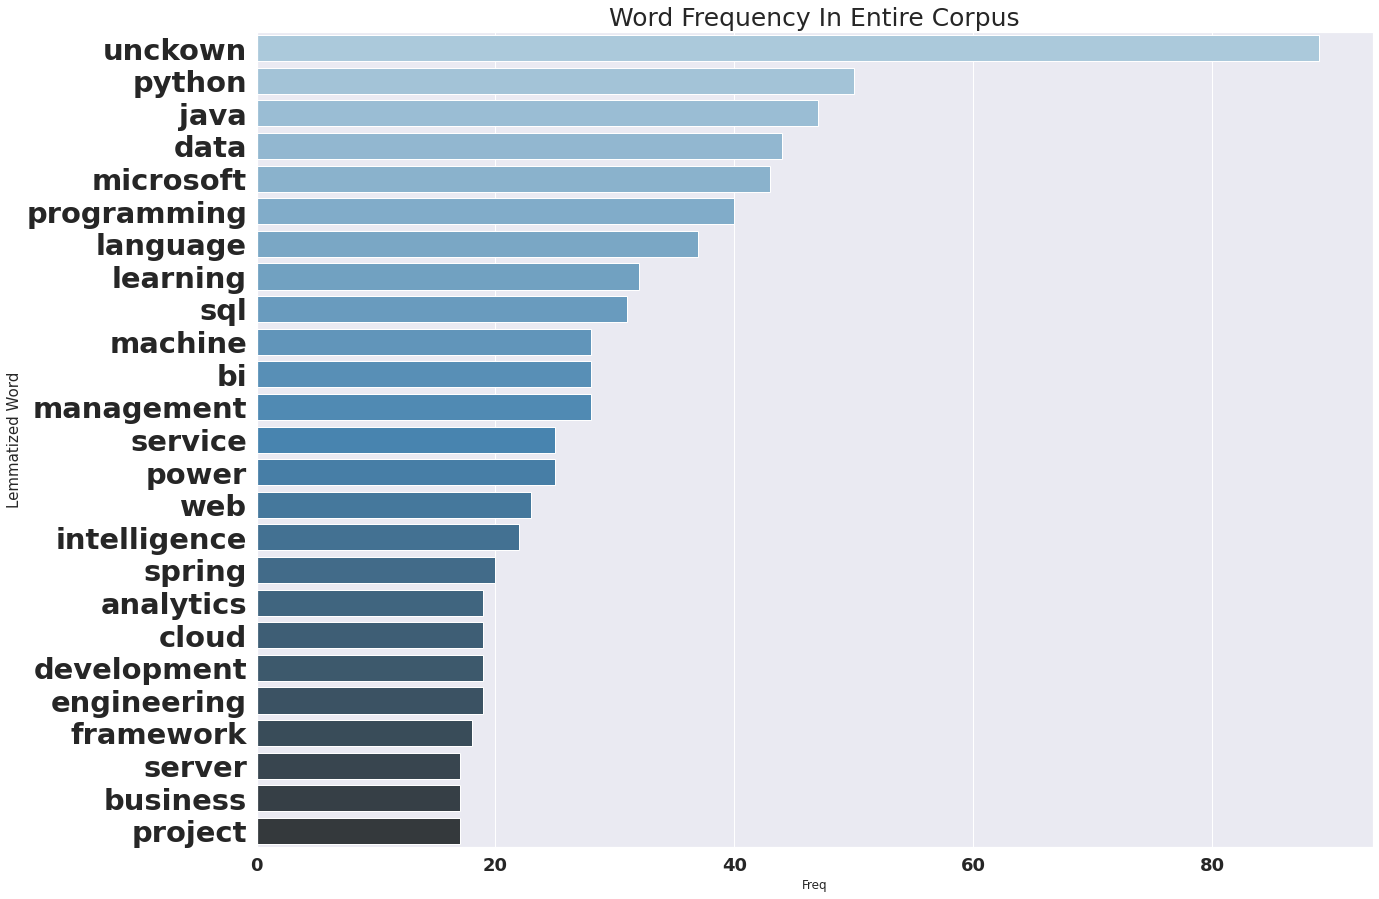

In [85]:
#Barplot of most freq words
lem_bar = sns.barplot(y = "Word", x = "Freq", data = top_df[:25], palette = "Blues_d", orient = 'h')
lem_bar.set_yticklabels(lem_bar.get_yticklabels(), fontsize = 29);
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Lemmatized Word', size = 15)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)

Index(['Word', 'Freq'], dtype='object')

In [90]:
# where does python fall within the word frequency dist
top_df.loc[top_df.Word == 'python']

,Word,Freq
1,python,50


In [ ]:
# test cell
# ident = top_df.loc[(top_df.Freq > 3) & (top_df.Freq < 2_000)]
# ident.head(50)

# N-grams

## Bigrams

In [91]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [92]:
# corpus with stopwords removed and list joined for n-gram distinction
ngram_corpus = df_desc.clean_words.str.join(' ')

In [93]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

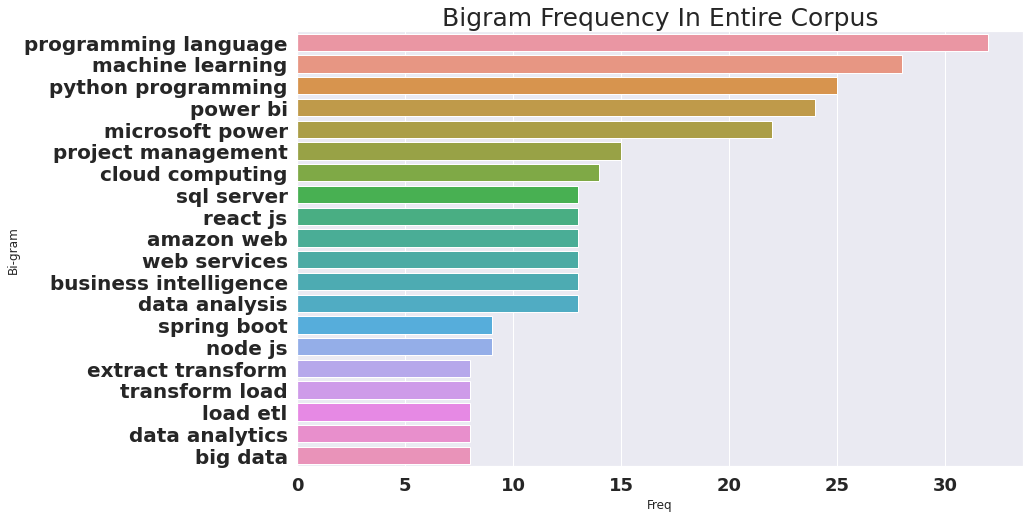

In [94]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
bbar = sns.barplot(y ="Bi-gram", x ="Freq", orient = 'h', data = top2_df[:20])
plt.title('Bigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 20);
plt.savefig('bigram_bar.png', dpi=200)

In [ ]:
# top2_df[200:250]

## Trigrams

In [95]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [96]:
top3_words = get_top_n3_words(ngram_corpus, n = len(ngram_corpus))
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]


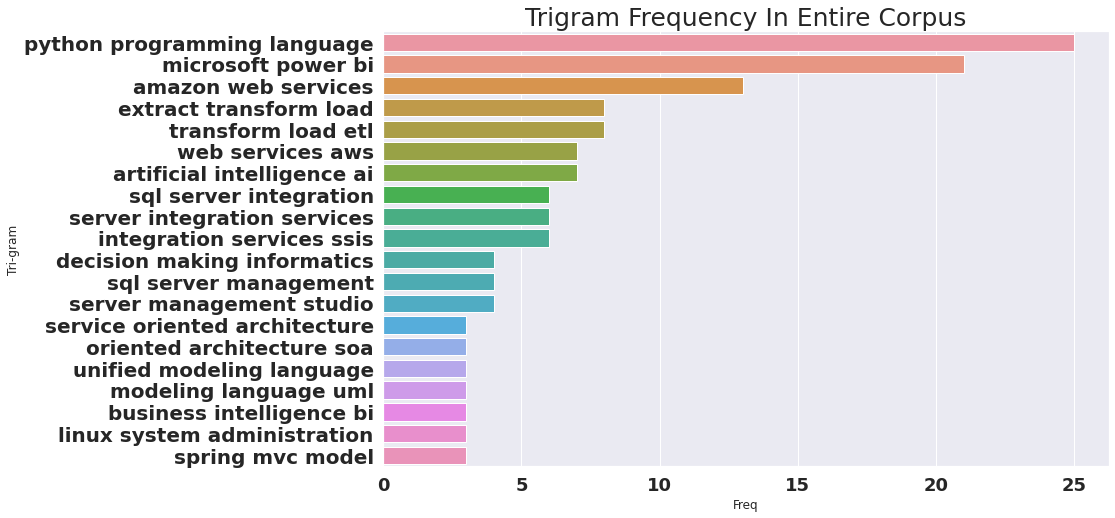

In [97]:
#Barplot of most freq Tri-grams
plt.tight_layout()
sns.set(rc={'figure.figsize':(13,8)})
tbar = sns.barplot(y = "Tri-gram", x = "Freq", orient = 'h', data = top3_df[:20])
plt.title('Trigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
tbar.set_yticklabels(tbar.get_yticklabels(), fontsize = 20);
plt.savefig('trigram_bar.png', dpi=200)

In [98]:
# top3_df[200:250]

,Tri-gram,Freq


# Saving Dataset 


In [99]:
df_desc.to_csv('df_description_processed.csv', index = False)

In [103]:
df_desc['clean_lemmed']

0       [sql, server, integration, service, ssis]
1                                       [redmine]
2                 [extract, transform, load, etl]
3                  [machine, learning, algorithm]
4                                   [e, commerce]
                          ...                    
1043                                   [strategy]
1044                                  [budgeting]
1045                                        [xml]
1046                                       [java]
1047                        [project, management]
Name: clean_lemmed, Length: 1048, dtype: object

In [ ]:
from bertopic import BERTopic


# Initialize BERTopic
model = BERTopic(language='english', calculate_probabilities=True)

# Fit BERTopic to the corpus
topics, probs = model.fit_transform(df_desc['text'])

# Print the top 10 topics and their probabilities
for topic, prob in zip(topics, probs):
    print(f'Topic {topic}: {prob:.3f}')

# Save the topics to a file
model.save('topics.bin')